# <center>***Итоговый проект для курса Data Science в медицине***</center>

В данной работе мы проведем анализ 3 датасетов с платформы kaggle.com.

*Подбор датасетов вызывает вопросы о корректности одновременного анализа данных по всем 3 датасетам одновременно, так как в [первом_датасете](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) в выборке представлены исключительно женщины из племени Пима с наличием/отсутствием сахарного диабета, [второй_датасет](https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea) посвящен сердечно-сосудистым заболеваниям, и [третий_датасет](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) основан на данных телефонного опроса граждан США и связан с факторами риска развития сахарного диабета.*

### <center>**Факторы риска развития сахарного диабета**</center>
К факторам высокого риска относят:
+ ожирение (индекс массы тела ≥ 30 кг/м²)
+ наследственность (наличие у родственников первой линии родства сахарного диабета 2 типа)
+ гестационный сахарный диабет или другие нарушения углеводного обмена в прошлом

*по данным ВОЗ,  ["Глобальный доклад по диабету"](https://iris.who.int/bitstream/handle/10665/275388/9789244565254-rus.pdf)*

### **<center> Первичная обработка данных первого датасета</center>**

In [674]:
# Импортируем библиотеки, которые могут нам понадобится в работе
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [675]:
#Прочитаем первый датасет
diabetes = pd.read_csv('diabetes.csv') 
display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [676]:
#Получим информацию о количестве строк и столбцов
diabetes.shape 

(768, 9)

In [677]:
#Получим детальную информацию о столбцах и типах данных
diabetes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Из вывода данных следует, что в таблице всего 8 столбцов, в которых нет пропусков значений, типы данных float64 и int64 . В столбце Outcome есть только два исхода - есть диабет или нет (1/0)

In [678]:
# получим описательную статистику по столбцам
diabetes.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


При анализе столбцов получили следующие данные:

*Столбец "Glucose"*
1. измерение проводили в мг/дл, что является крайне непривычным для врача в РФ. Если этот датасет будет использоваться в РФ, то необходимо будет перевести в ммоль/л, чтобы врачи могли использовать данные в клинической практике. 
2. Min значение указано 0 - это означает, что сбор данных проведен некачественно, целесообразнее было бы поставить пропуск вместо 0. Поэтому в дальнейшем напишем функцию, для нахождения строк с 0 значением и последующим их исключением

*Столбец "BloodPressure"*

1. Min значение указано 0 - это означает, что сбор данных проведен некачественно, целесообразнее было бы поставить пропуск вместо 0. Поэтому в дальнейшем напишем функцию, для нахождения строк с 0 значением и последующим их исключением
2. Исходя из значений, проводилось измерение только диастолического давления

*Столбец "SkinThickness"*

Min значение указано 0 - это означает, что сбор данных проведен некачественно, целесообразнее было бы поставить пропуск вместо 0. Поэтому в дальнейшем напишем функцию, для нахождения строк с 0 значением и последующим их исключением

*Столбец "Insulin"*

Min значение указано 0 - это означает, что сбор данных проведен некачественно, целесообразнее было бы поставить пропуск вместо 0. Поэтому в дальнейшем напишем функцию, для нахождения строк с 0 значением и последующим их исключением

*Столбец "BMI"*

Min значение указано 0 - это означает, что сбор данных проведен некачественно, целесообразнее было бы поставить пропуск вместо 0. Поэтому в дальнейшем напишем функцию, для нахождения строк с 0 значением и последующим их исключением

*Столбец "DiabetesPedigreeFunction"*

Дает информацию о генетических факторах риска развития сахарного диабета

*Столбец "возраст"*

Исследование проводили у лиц 21 до 81 года, средний возраст 33 года

*Столбец "Outcome"*

Содержит только 2 варианта  - есть диабет(1), или его нет (0)

**Вывод**

В датасете столбцы соответсвуют основным факторам риска развития сахарного диабета, однако необходимо провести очистку данных и фильтрацию для получения достоверного результата исследования.

 ### **<center> Очистка данных и фильтрация </center>**

In [679]:
#Чтобы не повредить исходную таблицу, создадим её копию
dataset1_df = diabetes.copy() 

In [680]:
# Отфильтруем данные, чтобы проверить, сколько записей содержит нули вместо значений
dataset1_df[(dataset1_df['Glucose'] == 0) | (dataset1_df['BloodPressure'] == 0) |(dataset1_df['Insulin'] == 0)|(dataset1_df['SkinThickness'] == 0)].shape[0]

375

Получаем информацию, что из 768 исходных строк непригодны к использованию 375, по причине неполных данных.

In [681]:
# Напишем функцию, чтобы удалить строки c 0 значениями из анализа данных
def remove_zero_values(dataset1_df):
    """
    Функуция удаляет строки из DataFrame, где значения в столбцах 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness' равны 0.

    Parameters:
    dataset1_df (pd.DataFrame): Входной DataFrame.

    Returns:
    pd.DataFrame: Новый DataFrame без строк с 0 значениями в указанных столбцах.
    """
    # Удаляем строки, где значения в указанных столбцах равны 0
    df_filtered = dataset1_df[
        (dataset1_df['Glucose'] != 0) & 
        (dataset1_df['BloodPressure'] != 0) &
        (dataset1_df['SkinThickness'] != 0) & 
        (dataset1_df['Insulin'] != 0)
    ]
    return df_filtered

dataset1_df = remove_zero_values(dataset1_df)

# Проверяем результат
print(dataset1_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

In [682]:
# Получим информацию о количестве строк и столбцов после очистки данных
dataset1_df.shape 

(393, 9)

In [683]:
# После фильтрации данных посмотрим, у какого числа пациентов выявлен диабет
dataset1_df['Outcome'].value_counts() 

Outcome
0    263
1    130
Name: count, dtype: int64

In [684]:
# В задании указано, что нужно использовать лямбда функции. Давайте примененим лямбда-функции для создания нового столбца "BMI_Category"
dataset1_df['BMI_Category'] = dataset1_df['BMI'].apply(lambda x: 'Нормальный' if x < 25 else 'Избыточный' if x < 30 else 'Ожирение')
print(dataset1_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome BMI_Category  
3                       0.167   21        0   Избыто

In [685]:
# Сделаем преобразование столбцов к типу данных category:
cols_to_exclude = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness' ]  # список столбцов, которые мы не берём во внимание
max_unique_count = 150  # задаём максимальное число уникальных категорий

for col in dataset1_df.columns:  # цикл по именам столбцов
    if dataset1_df[col].nunique() < max_unique_count and col not in cols_to_exclude:  # проверяем условие
        dataset1_df[col] = dataset1_df[col].astype('category')  # преобразуем тип столбца

# Проверим, всё ли поменялось
print(dataset1_df.info())  # вывод информации о DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 3 to 765
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               393 non-null    category
 1   Glucose                   393 non-null    int64   
 2   BloodPressure             393 non-null    int64   
 3   SkinThickness             393 non-null    int64   
 4   Insulin                   393 non-null    int64   
 5   BMI                       393 non-null    float64 
 6   DiabetesPedigreeFunction  393 non-null    float64 
 7   Age                       393 non-null    category
 8   Outcome                   393 non-null    category
 9   BMI_Category              393 non-null    category
dtypes: category(4), float64(2), int64(4)
memory usage: 25.3 KB
None


 ### **<center> Визуализация данных </center>**

Используем указанные в требованиях к оформлению работы графики для наглядного отображения влияния факторов риска на развитие сахарного диабета. Так как модуль по визуализации и очистке данных идет уже после Итогового проекта, самостоятельно изучим их применение.

1. **Histplot**


Гистограмма (histplot) используется для визуализации распределения значений одной переменной.


*Использование:*

Позволяет увидеть, как данные распределены (нормальное распределение, скошенное, равномерное и т.д.).

Помогает выявить выбросы и аномалии в данных.

Упрощает понимание центральной тенденции (среднее, медиана) и разброса (дисперсия, стандартное отклонение).


2. **Boxplot / Violinplot**


Boxplot (ящик с усами) и violinplot (виолончельный график) используются для визуализации распределения данных и их статистических характеристик.


*Использование:*

Boxplot:

Позволяет увидеть медиану, квартиль, выбросы и разброс данных.

Удобен для сравнения нескольких групп.



*Violinplot:*

Сочетает в себе информацию о распределении (как гистограмма) и статистические характеристики (как boxplot).

Позволяет увидеть форму распределения данных, что полезно для анализа непрерывных переменных.


3. **Heatmap для df.corr()**

Тепловая карта (heatmap) используется для визуализации корреляционной матрицы.


*Использование:*

Позволяет легко идентифицировать взаимосвязи между переменными.

Цветовая шкала помогает быстро увидеть, какие переменные имеют сильную или слабую корреляцию.

Упрощает выявление мультиколлинеарности и других взаимосвязей, что важно для построения моделей.

4. **Lmplot**

Lmplot — это график, показывающий линейную регрессию между двумя переменными.


*Использование:*

Позволяет визуализировать линейную зависимость между переменными.

Удобен для анализа трендов и предсказания значений.

Можно добавлять различные уровни (hue) для анализа подгрупп.

5.**Paired Boxplot / Violinplot**

Параллельные boxplot или violinplot используются для сравнения распределений одной переменной по разным группам.


*Использование:*

Позволяют увидеть, как одна переменная (например, BMI) отличается по категориям другой переменной (например, Outcome или BMI_Category).

Удобны для анализа и визуализации различий между группами.

6. **Catplot**

Catplot — это универсальный график для визуализации категориальных данных.


*Использование:*

Позволяет создавать различные виды графиков (box, violin, bar и т.д.) для сравнения категориальных переменных.

Удобен для анализа взаимосвязей между категориальными и непрерывными переменными.

Позволяет визуализировать распределение и центральные тенденции по категориям.


<Axes: >

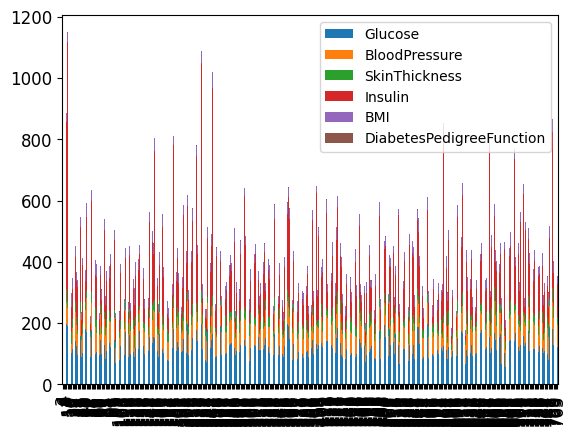

In [686]:
#Horizontal Bar Plot
dataset1_df.plot.bar(stacked=True, fontsize=12)

**Вывод** Наибольшее влияние оказывает уровень инсулина в крови

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

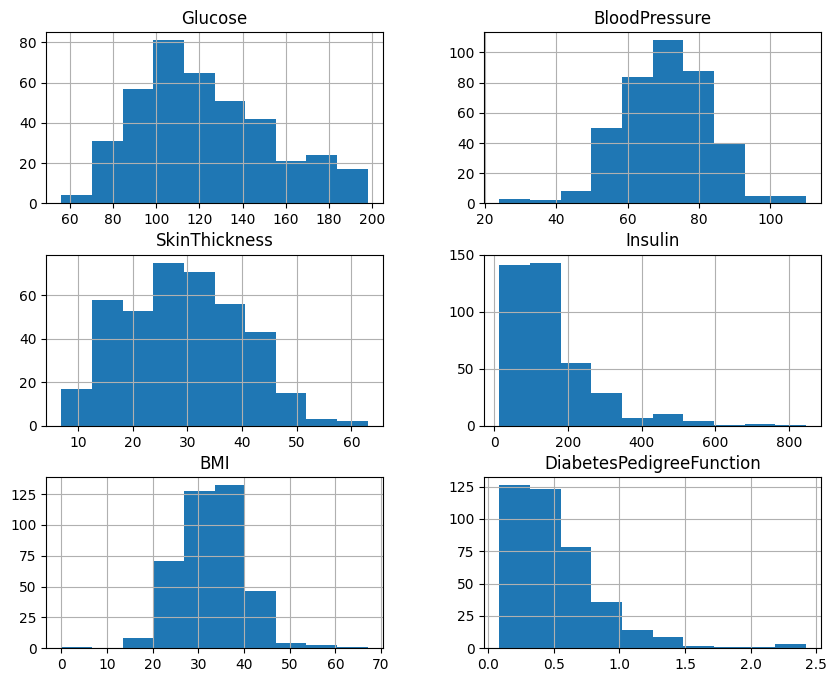

In [687]:
#Histogram
dataset1_df.hist(figsize = (10,8))

**Вывод** График показывает распределение по столбцам

Glucose                        Axes(0.125,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.398529,0.653529;0.227941x0.226471)
SkinThickness               Axes(0.672059,0.653529;0.227941x0.226471)
Insulin                        Axes(0.125,0.381765;0.227941x0.226471)
BMI                         Axes(0.398529,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

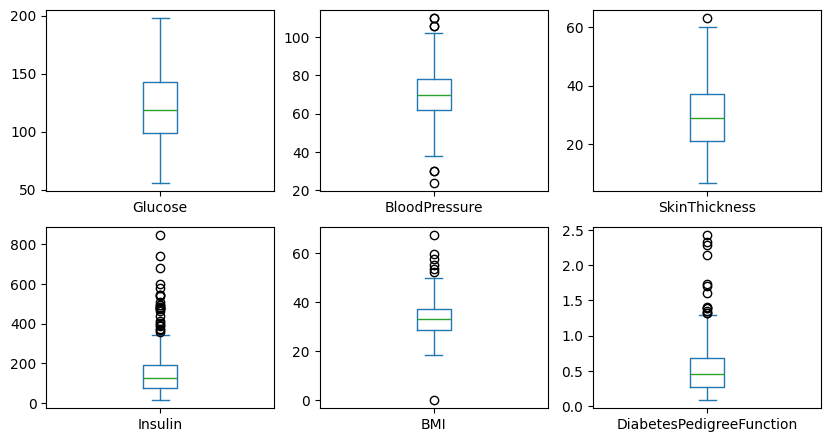

In [688]:
#Box Plot
dataset1_df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

**Вывод** Наибольшее влияние оказывает уровень инсулина в крови

Важной частью любого исследования является расчет корреляции. Сначала напишем функцию, а затем построим тепловую карту.

In [689]:
#Напишем функцию для интерпретации результата коэффициента корреляции
def correlation_tie(correlation):
    """
    Определяет уровень корреляции на основе переданного значения корреляции.

    Параметры:
    correlation (float): Значение корреляции, которое должно находиться в диапазоне от 0 до 1.

    Возвращает:
    str: Описание уровня корреляции:
        - "Практически нет корреляции" для значений от 0 до 0.2
        - "Слабая корреляция" для значений от 0.2 до 0.5
        - "Умеренная корреляция" для значений от 0.5 до 0.7
        - "Сильная корреляция" для значений от 0.7 до 0.9
        - "Очень сильная корреляция" для значений от 0.9 до 1
        - "Некорректное значение корреляции" для значений вне диапазона 0-1
    """
    if 0 <= correlation < 0.2:
        return "Практически нет корреляции"
    elif 0.2 <= correlation < 0.5:
        return "Слабая корреляция"
    elif 0.5 <= correlation < 0.7:
        return "Умеренная корреляция"
    elif 0.7 <= correlation < 0.9:
        return "Сильная корреляция"
    elif 0.9 <= correlation <= 1:
        return "Очень сильная корреляция"
    else:
        return "Некорректное значение корреляции"  

#посмотрим отдельно корреляцию между уровнем инсулина и Outcome
correlationIO = dataset1_df['Insulin'].corr(dataset1_df['Outcome'])
# Применение функции к результату корреляции
result = correlation_tie(correlationIO)
# Вывод результата
print(f"Корреляция между 'Insulin' и 'Outcome': {correlationIO}")
print(f"Уровень корреляции: {result}")

#посмотрим отдельно корреляцию между уровнем глюкозы и Outcome
correlationGO = dataset1_df['Glucose'].corr(dataset1_df['Outcome'])
# Применение функции к результату корреляции
result = correlation_tie(correlationGO)
# Вывод результата
print(f"Корреляция между 'Glucose' и 'Outcome': {correlationGO}")
print(f"Уровень корреляции: {result}")

#посмотрим отдельно корреляцию между уровнем BloodPressure и Outcome
correlationBPO = dataset1_df['BloodPressure'].corr(dataset1_df['Outcome'])
# Применение функции к результату корреляции
result = correlation_tie(correlationBPO)
# Вывод результата
print(f"Корреляция между 'BloodPressure' и 'Outcome': {correlationBPO}")
print(f"Уровень корреляции: {result}")

Корреляция между 'Insulin' и 'Outcome': 0.3021284423555959
Уровень корреляции: Слабая корреляция
Корреляция между 'Glucose' и 'Outcome': 0.5156316402445239
Уровень корреляции: Умеренная корреляция
Корреляция между 'BloodPressure' и 'Outcome': 0.19343797392079617
Уровень корреляции: Практически нет корреляции


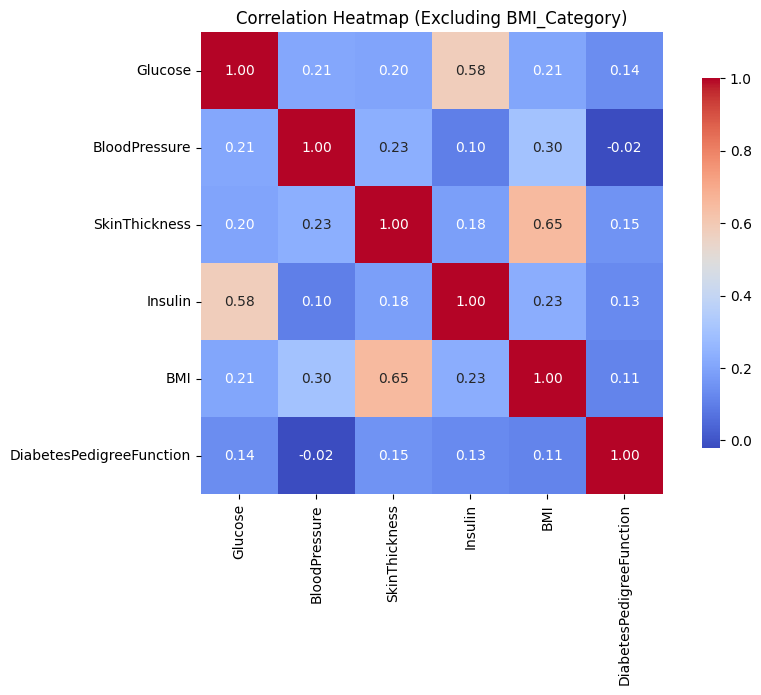

In [690]:
#Correlation Plot
# Исключаем столбец BMI_Category
columns_to_include = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
corr_data = dataset1_df[columns_to_include].select_dtypes(include=['int64', 'float64'])  # Выбираем только числовые столбцы для корреляции

# Вычисление корреляционной матрицы
Corr = corr_data.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))  # Задаем размер графика
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Показываем график
plt.title('Correlation Heatmap (Excluding BMI_Category)')
plt.show()

**Вывод** Наибольшее влияние оказывает уровень глюкозы в крови

<Figure size 1000x600 with 0 Axes>

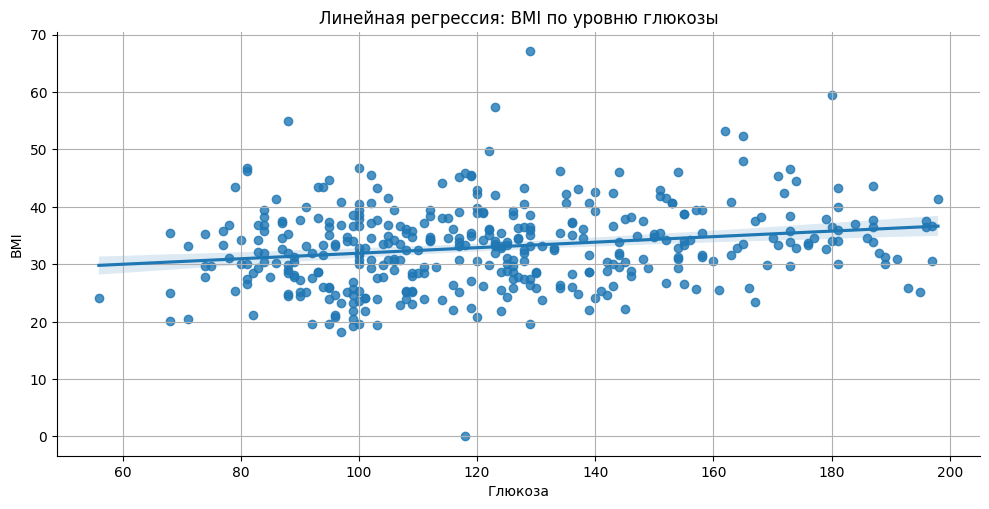

In [691]:
# Lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(data=dataset1_df, x='Glucose', y='BMI', aspect=2)
plt.title('Линейная регрессия: BMI по уровню глюкозы')
plt.xlabel('Глюкоза')
plt.ylabel('BMI')
plt.grid()
plt.show()

**Вывод** Показывает линейную регрессию: BMI по уровню глюкозы, чем выше BMI, тем выше уровень глюкозы в крови

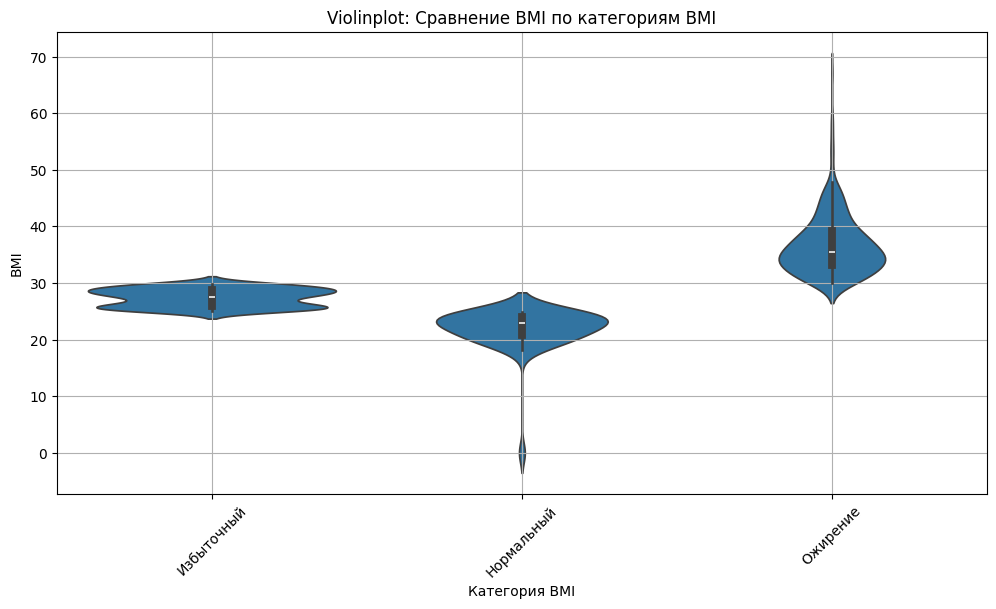

In [692]:
#violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataset1_df, x='BMI_Category', y='BMI')
plt.title('Violinplot: Сравнение BMI по категориям BMI')
plt.xlabel('Категория BMI')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.grid()
plt.show()

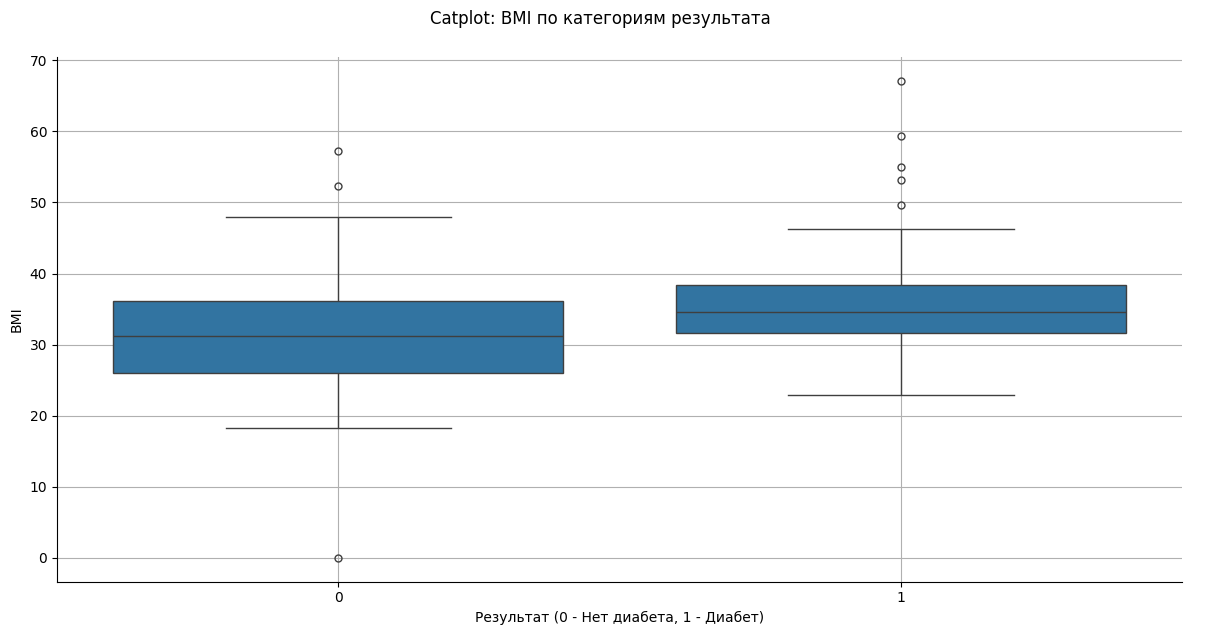

In [693]:
# Catplot для визуализации BMI по категориям Outcome
g = sns.catplot(data=dataset1_df, x='Outcome', y='BMI', kind='box', height=6, aspect=2)
g.fig.suptitle('Catplot: BMI по категориям результата', y=1.05)
plt.xlabel('Результат (0 - Нет диабета, 1 - Диабет)')
plt.ylabel('BMI')
plt.grid()
plt.show()

In [694]:
**Вывод** BMI по категориям результата: чем выше BMI, тем чаще диагностируют диабет

SyntaxError: invalid syntax (2096703891.py, line 1)

### **<center> Выводы на основании анализа первого датасета </center>**

1. Внешние факторы, оказывающие сильное влияние на развитие сахарного диабета:
- ИМТ
- возраст
- беременность
2. Внутренние факторы, оказывающие сильное влияние на развитие сахарного диабета:
- уровень глюкозы
- уровень инсулина
3. Факторы, не оказывающие влияния на развитие сахарного диабета:
- толщина кожи
- артериальное давление

**Профилактика развития сахарного диабета**
[по данным ВОЗ](https://www.who.int/ru/news-room/fact-sheets/detail/diabetes)
- добиться здоровой массы тела и поддерживать ее;
- поддерживать физически активный образ жизни, уделяя не менее 150 минут в неделю физическим упражнениям умеренной интенсивности;
- соблюдать здоровый рацион питания и уменьшать потребление сахаров и насыщенных жиров;
- измерение уровня сахара для выявления гестационного сахарного диабета

### **<center> Первичная обработка данных второго датасета</center>**

In [ ]:
# Прочитаем второй датасет
diabetes2 = pd.read_csv('train.csv') 
display(diabetes2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
# Получим информацию о количестве строк и столбцов
diabetes2.shape 

(3390, 17)

In [ ]:
# Получим детальную информацию о столбцах и типах данных
diabetes2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Чтобы не повредить исходную таблицу, создадим её копию
dataset2_df = diabetes2.copy() 

In [ ]:
# Удалим строки со значением NaN, так как их нельзя использовать в анализе
dataset2_df = dataset2_df.dropna()

# Преобразуем тип данных по столбцам одинаковым с dataframe 1 : Glucose к категории int64
dataset2_df['glucose'] = dataset2_df['glucose'].astype('int64')

# Проверка результата
print(dataset2_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   sex              2927 non-null   object 
 4   is_smoking       2927 non-null   object 
 5   cigsPerDay       2927 non-null   float64
 6   BPMeds           2927 non-null   float64
 7   prevalentStroke  2927 non-null   int64  
 8   prevalentHyp     2927 non-null   int64  
 9   diabetes         2927 non-null   int64  
 10  totChol          2927 non-null   float64
 11  sysBP            2927 non-null   float64
 12  diaBP            2927 non-null   float64
 13  BMI              2927 non-null   float64
 14  heartRate        2927 non-null   float64
 15  glucose          2927 non-null   int64  
 16  TenYearCHD       2927 non-null   int64  
dtypes: float64(8), int6

In [ ]:
# Получим описательную статистику по столбцам, одинаковым с dataframe 1 : BMI, Age, glucose
dataset2_df.describe().loc[:,['BMI', 'age', 'glucose']]

,BMI,age,glucose
count,2927.000000,2927.000000,2927.000000
mean,25.797041,49.507345,81.934404
std,4.130376,8.597191,24.106943
min,15.960000,32.000000,40.000000
25%,23.030000,42.000000,71.000000
50%,25.380000,49.000000,78.000000
75%,28.040000,56.000000,87.000000
max,56.800000,70.000000,394.000000


### **<center> Первичная обработка данных третьего датасета</center>**

In [ ]:
# Прочитаем третий датасет
diabetes3 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv') 
display(diabetes3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
# Получим информацию о количестве строк и столбцов
diabetes3.shape 

(70692, 22)

In [ ]:
# Получим детальную информацию о столбцах и типах данных
diabetes3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# Чтобы не повредить исходную таблицу, создадим её копию
dataset3_df = diabetes3.copy() 

In [ ]:
# Преобразуем тип данных к категории int64. Так как у всех строк тип float64, то можем преобразовать сразу весь DF
dataset3_df = dataset3_df.astype('int64')

В 3 датафрейме возраст считается по категориям от 1 до 13, поэтому нужно будет в датасетах 1 и 2 так же привести данные к таким категориям

In [ ]:
def age_groups(Age: int) -> int:
    """Эта функция определяет возрастную группу по классификации третьего датасета.
        Параметры:
            Age - возраст в годах
        Возвращаемое значение:
            число, обозначающее возрастную группу.
            Если группа не входит в диапазоны, функция вернет NaN.
    """
    if Age in range(18, 25): return 1
    if Age in range(25, 30): return 2
    if Age in range(30, 35): return 3
    if Age in range(35, 40): return 4
    if Age in range(40, 45): return 5
    if Age in range(45, 50): return 6
    if Age in range(50, 55): return 7
    if Age in range(55, 60): return 8
    if Age in range(60, 65): return 9
    if Age in range(65, 70): return 10
    if Age in range(70, 75): return 11
    if Age in range(75, 80): return 12
    if Age >= 80: return 13
    return np.nan

# Применим функцию ко первому датасету и сохраним результат
dataset1_df['age_group'] = dataset1_df['Age'].apply(age_groups)

# Посмотрим на результат
print(dataset1_df[['Age', 'age_group']])

    Age  age_group
3    21          1
4    33          3
6    26          2
8    53          7
13   59          8
..   ..        ...
753  26          2
755  37          4
760  22          1
763  63          9
765  30          3

[393 rows x 2 columns]


In [ ]:
def age_groups(age: int) -> int:
    """Эта функция определяет возрастную группу по классификации третьего датасета.
        Параметры:
            age - возраст в годах
        Возвращаемое значение:
            число, обозначающее возрастную группу.
            Если группа не входит в диапазоны, функция вернет NaN.
    """
    if age in range(18, 25): return 1
    if age in range(25, 30): return 2
    if age in range(30, 35): return 3
    if age in range(35, 40): return 4
    if age in range(40, 45): return 5
    if age in range(45, 50): return 6
    if age in range(50, 55): return 7
    if age in range(55, 60): return 8
    if age in range(60, 65): return 9
    if age in range(65, 70): return 10
    if age in range(70, 75): return 11
    if age in range(75, 80): return 12
    if age >= 80: return 13
    return np.nan

# Применим функцию ко второму датасету и сохраним результат
dataset2_df['age_group'] = dataset2_df['age'].apply(age_groups)

# Посмотрим на результат
print(dataset2_df[['age', 'age_group']])

      age  age_group
1      36          4
2      46          6
3      50          7
4      64          9
5      61          9
...   ...        ...
3384   61          9
3385   60          9
3386   46          6
3387   44          5
3389   54          7

[2927 rows x 2 columns]


In [ ]:
# Так как в третьем датасете колонка 'Age' включает в себя возраст по категориям, переименуем её для корректного обьединения
dataset3_df.rename(columns={'Age':'age_group'}, inplace=True)

# Преобразование типов данных по столбцам одинаковым с dataframe 1 и 2: BMI и Glucose к категории 
dataset3_df['BMI'] = dataset3_df['BMI'].astype('float64')

# Проверка результата
dataset3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  int64  
 1   HighBP                70692 non-null  int64  
 2   HighChol              70692 non-null  int64  
 3   CholCheck             70692 non-null  int64  
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  int64  
 6   Stroke                70692 non-null  int64  
 7   HeartDiseaseorAttack  70692 non-null  int64  
 8   PhysActivity          70692 non-null  int64  
 9   Fruits                70692 non-null  int64  
 10  Veggies               70692 non-null  int64  
 11  HvyAlcoholConsump     70692 non-null  int64  
 12  AnyHealthcare         70692 non-null  int64  
 13  NoDocbcCost           70692 non-null  int64  
 14  GenHlth               70692 non-null  int64  
 15  MentHlth           

### **<center> Конкатенация трех датасетов </center>**

*В задании указано, что необходимо проанализировать все 3 датасета совместно. На мой взгляд, раздельный анализ каждого из 3 датафреймов был бы более информативным, так как у нас в итоге получается всего 2 столбца, по которым можно "склеить" таблицы - это Age и BMI. В условиях реальной жизни огромная работа по сбору данных оказалась проделана впустую. К счастью, это только проект. Но, к сожалению, нет времени и возможностей углубится в анализ данных по каждому датафрейму, но я постаралась сделать "сжатый анализ", соответствующий критериям оценки. Надеюсь, этого будет достаточно для зачета по проекту.*

In [ ]:
# Объединяем три DataFrame
merged_data = pd.concat([dataset1_df, dataset2_df, dataset3_df], axis=0, ignore_index=True)

# Выводим информацию о новом DataFrame
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74012 entries, 0 to 74011
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               393 non-null    category
 1   Glucose                   393 non-null    float64 
 2   BloodPressure             393 non-null    float64 
 3   SkinThickness             393 non-null    float64 
 4   Insulin                   393 non-null    float64 
 5   BMI                       74012 non-null  float64 
 6   DiabetesPedigreeFunction  393 non-null    float64 
 7   Age                       393 non-null    category
 8   Outcome                   393 non-null    category
 9   BMI_Category              393 non-null    category
 10  age_group                 74012 non-null  int64   
 11  id                        2927 non-null   float64 
 12  age                       2927 non-null   float64 
 13  education                 2927 non-null   floa

In [ ]:
# Выводим первые несколько строк объединенного DataFrame для проверки
print(merged_data.head())

  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           1     89.0           66.0           23.0     94.0  28.1   
1           0    137.0           40.0           35.0    168.0  43.1   
2           3     78.0           50.0           32.0     88.0  31.0   
3           2    197.0           70.0           45.0    543.0  30.5   
4           1    189.0           60.0           23.0    846.0  30.1   

   DiabetesPedigreeFunction Age Outcome BMI_Category  ...  HvyAlcoholConsump  \
0                     0.167  21       0   Избыточный  ...                NaN   
1                     2.288  33       1     Ожирение  ...                NaN   
2                     0.248  26       1     Ожирение  ...                NaN   
3                     0.158  53       1     Ожирение  ...                NaN   
4                     0.398  59       1     Ожирение  ...                NaN   

   AnyHealthcare  NoDocbcCost  GenHlth MentHlth PhysHlth  DiffWalk  Sex  \
0            NaN 

In [ ]:
# оставим только одинаковые столбцы, так как только их можно использовать в анализе сразу 3 датасетов
columns_to_keep = ['age_group', 'BMI']
merged_data = merged_data[columns_to_keep]

# Выводим информацию о новом DataFrame
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74012 entries, 0 to 74011
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age_group  74012 non-null  int64  
 1   BMI        74012 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB
None


In [ ]:
# Функция для классификации BMI
def categorize_bmi(bmi):
    """
    Классифицирует значение индекса массы тела (BMI) по категориям.

    Параметры:
    ----------
    bmi : float
        Индекс массы тела (BMI), который необходимо классифицировать.

    Возвращает:
    ----------
    str
        Класс категории BMI:
        - 'Недостаточный вес' для BMI < 18.5
        - 'Нормальный вес. Идеальный вес, не несущий опасности для здоровья.' для 18.5 <= BMI < 25
        - 'Избыточный вес. Возникает вероятность развития сопутствующих заболеваний.' для 25 <= BMI < 30
        - 'Ожирение I степени.' для 30 <= BMI < 35
        - 'Ожирение II степени.' для 35 <= BMI < 40
        - 'Ожирение III степени.' для BMI >= 40
    """
    if bmi < 18.5:
        return 'Недостаточный вес'
    elif 18.5 <= bmi < 25:
        return 'Нормальный вес'
    elif 25 <= bmi < 30:
        return 'Избыточный вес'
    elif 30 <= bmi < 35:
        return 'Ожирение I степени'
    elif 35 <= bmi < 40:
        return 'Ожирение II степени'
    else:  # bmi >= 40
        return 'Ожирение III степени'

# Применение функции к столбцу BMI
merged_data['BMI_Category'] = merged_data['BMI'].apply(categorize_bmi)

# Выводим результаты
print(merged_data[['BMI', 'BMI_Category']].head())

    BMI          BMI_Category
0  28.1        Избыточный вес
1  43.1  Ожирение III степени
2  31.0    Ожирение I степени
3  30.5    Ожирение I степени
4  30.1    Ожирение I степени


In [ ]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74012 entries, 0 to 74011
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_group     74012 non-null  int64  
 1   BMI           74012 non-null  float64
 2   BMI_Category  74012 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


 ### **<center> Визуализация данных </center>**

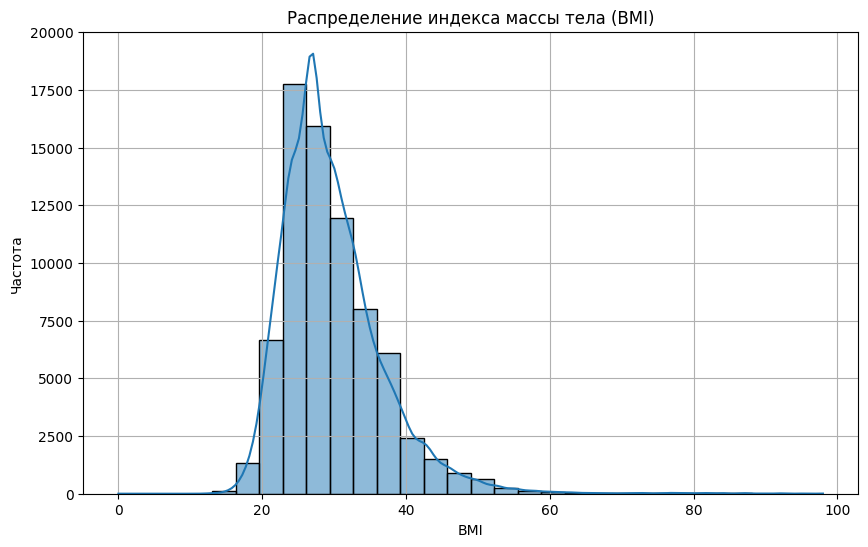

In [ ]:
#Histplot
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['BMI'], bins=30, kde=True)
plt.title('Распределение индекса массы тела (BMI)')
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.grid()
plt.show()

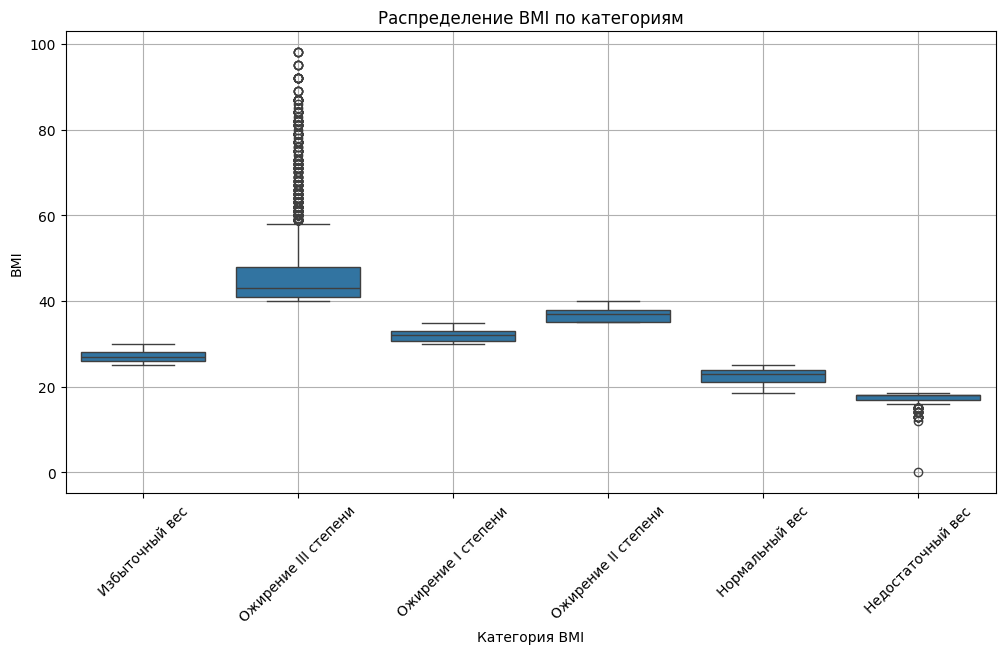

In [ ]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='BMI_Category', y='BMI')
plt.title('Распределение BMI по категориям')
plt.xlabel('Категория BMI')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.grid()
plt.show()

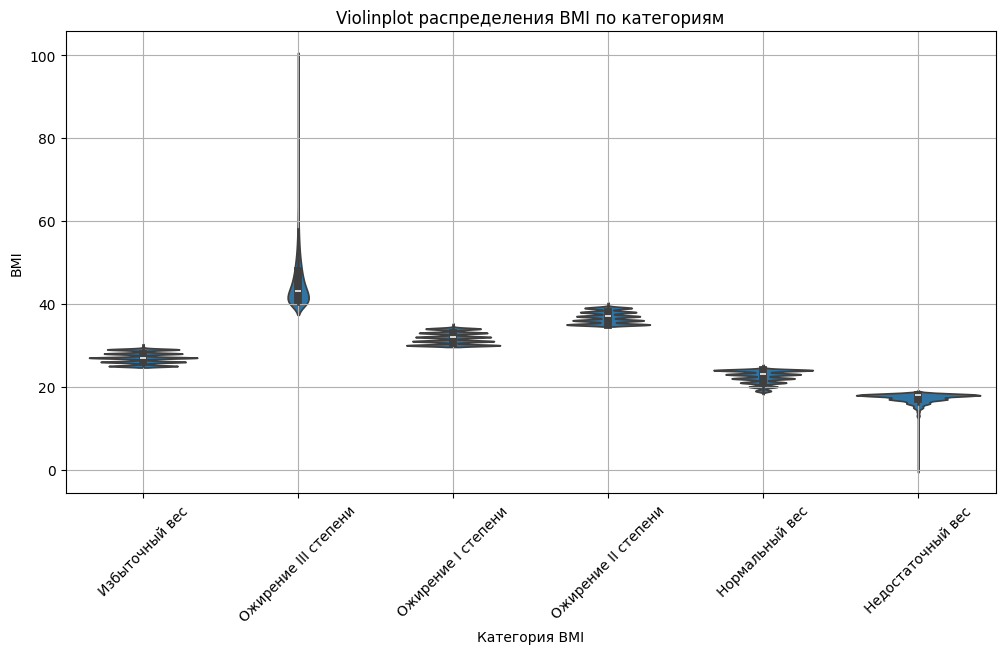

In [ ]:
# Violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(data=merged_data, x='BMI_Category', y='BMI')
plt.title('Violinplot распределения BMI по категориям')
plt.xlabel('Категория BMI')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.grid()
plt.show()

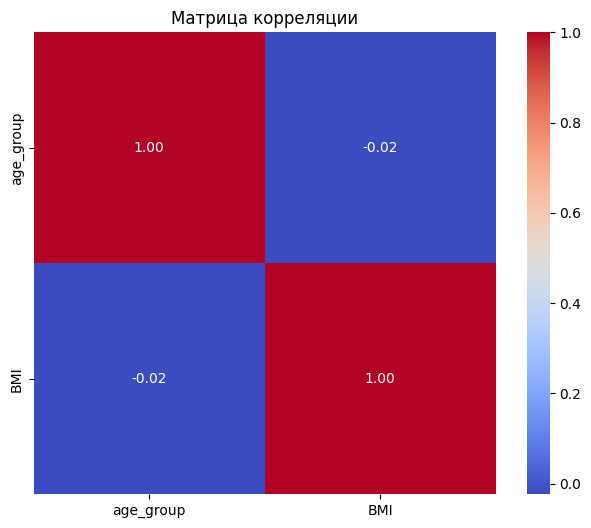

In [ ]:
# Рассчитаем значение корреляции
# Выберем только числовые столбцы для вычисления корреляции
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Вычислим корреляцию
correlation_matrix = numeric_data.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

<Figure size 1000x600 with 0 Axes>

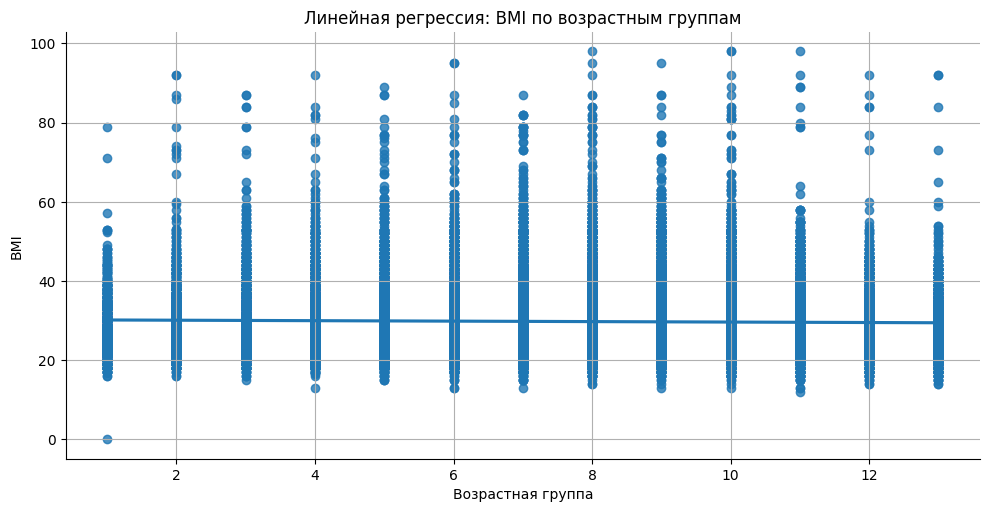

In [ ]:
# Lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(data=merged_data, x='age_group', y='BMI', aspect=2)
plt.title('Линейная регрессия: BMI по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('BMI')
plt.grid()
plt.show()

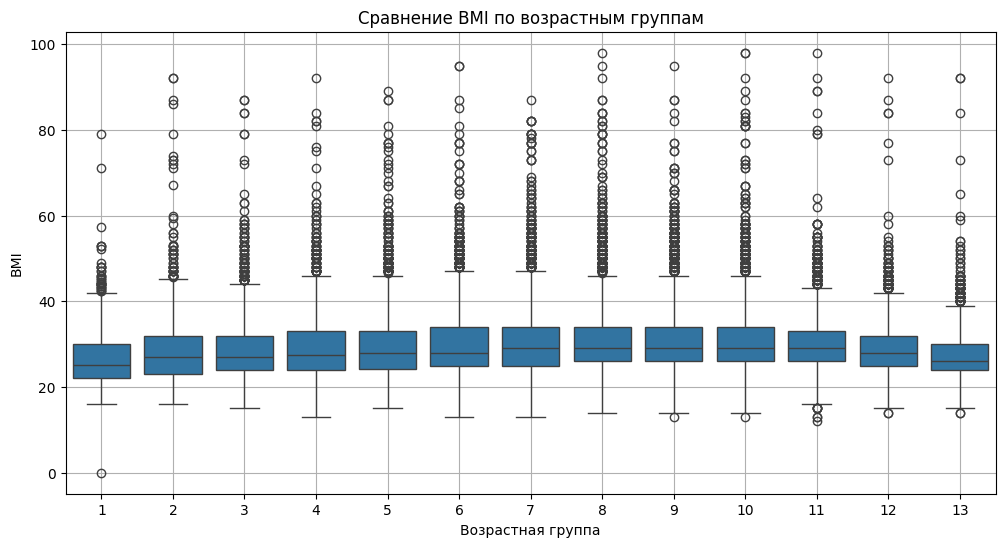

In [ ]:
#paired boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='BMI', data=merged_data)
plt.title('Сравнение BMI по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('BMI')
plt.grid()
plt.show()

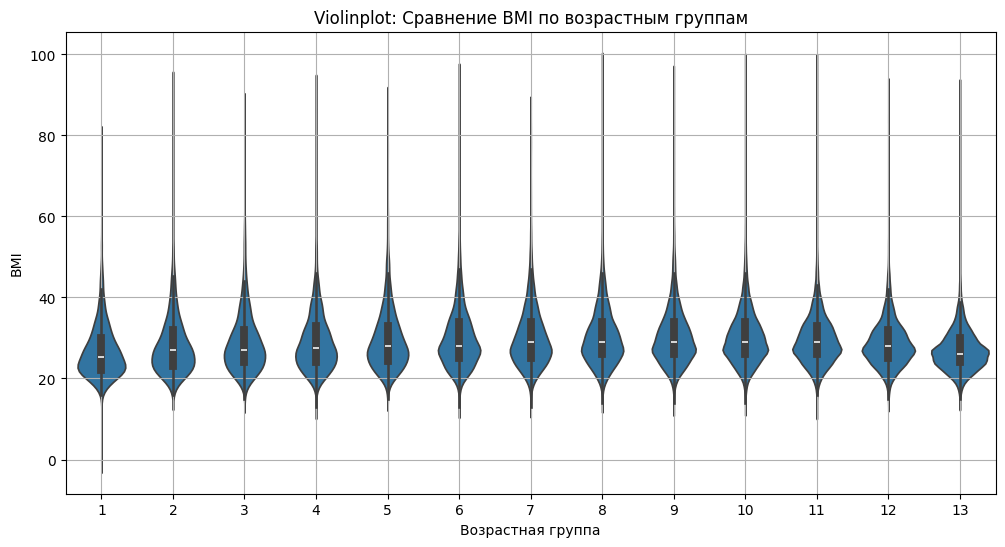

In [ ]:
# paired violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x='age_group', y='BMI', data=merged_data)
plt.title('Violinplot: Сравнение BMI по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('BMI')
plt.grid()
plt.show()

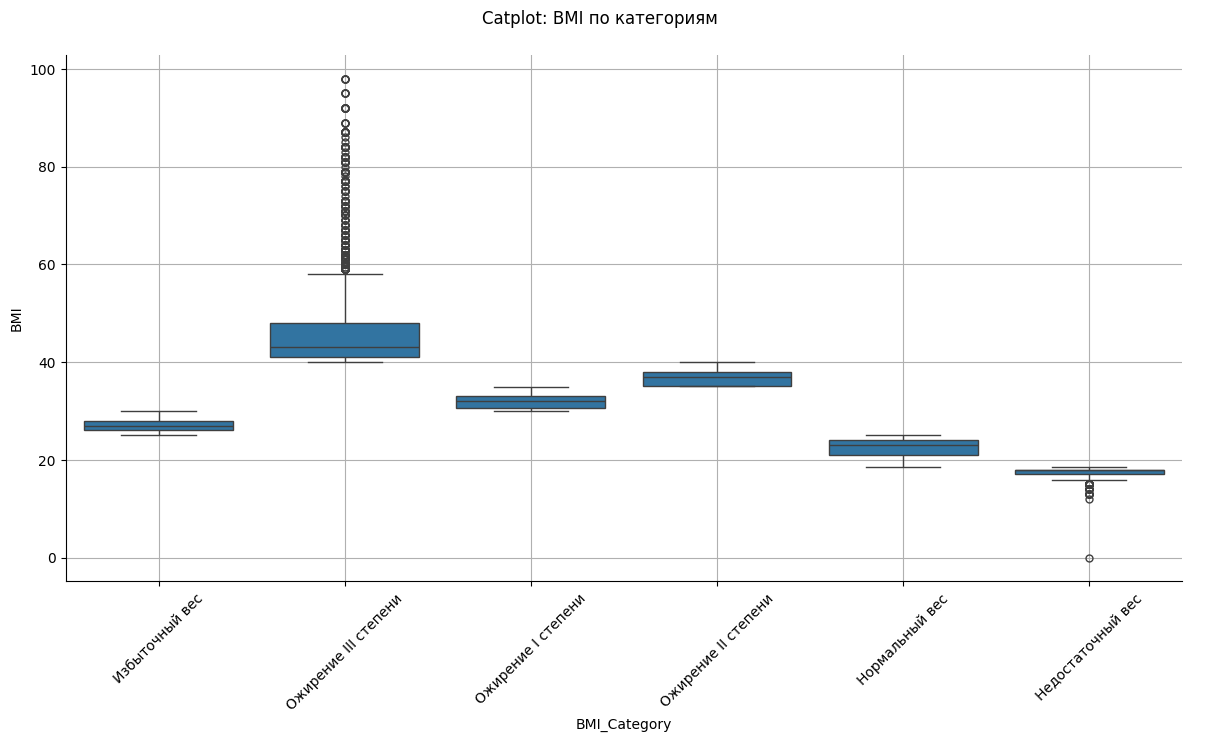

In [ ]:
# catplot
g = sns.catplot(data=merged_data, x='BMI_Category', y='BMI', kind='box', height=6, aspect=2)
g.fig.suptitle('Catplot: BMI по категориям', y=1.05)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### **<center> Выводы </center>**

На основании данных графиков можно утверждать об отсутсвии корреляции между возрастом и BMI.

*На примере данной работы можно увидеть, как важно правильно проводить фильтрацию и очистку данных. Наиболее показательной является фраза "Garbage in - Garbage out". Ошибки на любом этапе могут привести к недостоверному результату исследования, или, что гораздо хуже, ошибке, которая не будет обнаружена и станет ложной подтвержденной гипотезой. Применительно к нашему случаю: подбор датасетов, организация со стороны методического отдела, старания студентов-врачей приводят к "Garbage in - Data Scientist out"*

1. Внешние факторы, оказывающие сильное влияние на развитие сахарного диабета:
- ИМТ
- возраст
- беременность
2. Внутренние факторы, оказывающие сильное влияние на развитие сахарного диабета:
- уровень глюкозы
- уровень инсулина
3. Факторы, не оказывающие влияния на развитие сахарного диабета:
- толщина кожи
- артериальное давление

**Профилактика развития сахарного диабета**
[по данным ВОЗ](https://www.who.int/ru/news-room/fact-sheets/detail/diabetes)
- добиться здоровой массы тела и поддерживать ее;
- поддерживать физически активный образ жизни, уделяя не менее 150 минут в неделю физическим упражнениям умеренной интенсивности;
- соблюдать здоровый рацион питания и уменьшать потребление сахаров и насыщенных жиров;
- измерение уровня сахара для выявления гестационного сахарного диабета